<center>
  <h2>MIA-07 Redes Neuronales y Aprendizaje Profundo, Problema 2</h2>
  <h3>Sección A, Grupo 2</h3>
</center>

<br>

<center>
  <table style="border-collapse:collapse; background-color:white;">
    <tr>
      <td style="background-color:white; padding: 10px;"><b>Bernie Hans, Benitez A.</b><br>bernie.benitez.a@uni.pe</td>
      <td style="background-color:white; padding: 10px;"><b>Ramirez Ucañay, Barbarita P. J.</b><br>barbarita.ramirez.u@uni.pe</td>
      <td style="background-color:white; padding: 10px;"><b>Siu Siu Ting, Aldo D.</b><br>aldo.siu.s@uni.pe</td>
    </tr>
    <tr>
      <td style="background-color:white; padding: 10px;"><b>Diaz Cabrera, Alexander G.</b><br>alexandergabrieldiazcabrera@gmail.com</td>
      <td style="background-color:white; padding: 10px;"><b>Morales Ccasa, Geyson D.</b><br>geyson.morales.c@uni.pe</td>
      <td style="background-color:white; padding: 10px;"></td>
    </tr>
  </table>
</center>



---
#### Paquetería

1. `import math`: Importa funciones matemáticas básicas.
2. `import random`: Genera números aleatorios o selecciona elementos aleatoriamente.
3. `import numpy as np`: Importa `numpy` para trabajar eficientemente con arreglos y matrices.
4. `import torch`: Es esencial para trabajar con PyTorch, creando y manipulando tensores (similares a matrices de numpy), y util para proyectos de aprendizaje profundo.
5. `import matplotlib.pyplot as plt`: Crea gráficos y visualizaciones de datos.
6. `%matplotlib inline`: Muestra gráficos directamente en el notebook.


In [1]:
import math
import random
import numpy as np
import torch
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display, Math

#### Clase `Value`

La clase `Value`, es uno de los elementos básicos en `micrograd`, la cual representa un nodo dentro de la arquitectura computacional de la red neuronal artificial profunda, que guarda un valor (`data`), su gradiente respectivo (`grad`) y la información necesaria para realizar la retropropagación.

- **`__init__`:** Inicializa el objeto con el valor `data`, un conjunto de hijos `_children` (otros objetos `Value` de los que dependerá), el operador `_op` que creó el valor (por ejemplo, +, *), y un `label` opcional para nombrar el valor.

- **`__repr__`:** Representa el objeto `Value` de manera legible mostrando solo el valor de `data`.

- **Operaciones matemáticas:** Los métodos `__add__`, `__sub__`, y `__mul__` implementan las operaciones de suma, resta y multiplicación, respectivamente. Cada una de estas actualiza el gradiente correspondiente en la retropropagación con `backward()`.

- **`relu()`:** Implementa la función de activación ReLU (Rectified Linear Unit), que es ampliamente usada en redes neuronales para introducir no linealidad.

$$
ReLU(z) = \max(0, z)
$$

- **`backward()`:** Es la función que calcula cómo los valores deben ajustarse (retropropagación) `backward`.


In [2]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"

 # Operaciones aricméticas de suma, resta y multiplicación que se van a
 # realizar directamente entre los objetos de tipo Value.
    
 # Suma
    def __add__(self, other):
        if not isinstance(other, Value):
            other = Value(other)
        out = Value(self.data + other.data, (self, other), '+')
        def _backward():
            self.grad += out.grad
            other.grad += out.grad
        out._backward = _backward
        return out

 # Resta
    def __sub__(self, other):
        if not isinstance(other, Value):
            other = Value(other)
        out = Value(self.data - other.data, (self, other), '-')
        def _backward():
            self.grad += out.grad
            other.grad += -out.grad
        out._backward = _backward
        return out

 # Multiplicación
    def __mul__(self, other):
        if not isinstance(other, Value):
            other = Value(other)
        out = Value(self.data * other.data, (self, other), '*')
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward
        return out
    
 # Función de activación Relu
    def relu(self):
        out = Value(max(0, self.data), (self,), 'ReLU')
        def _backward():
            self.grad += (out.data > 0) * out.grad
        out._backward = _backward
        return out

  # Retropropagación (Backward)  
    def backward(self):
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)
        self.grad = 1.0
        for v in reversed(topo):
            v._backward()

# Definir los pesos y sesgos de la red neuronal manualmente

W1 = [[Value(-0.7731), Value(0.1601), Value(0.4321)],
      [Value(-0.0346), Value(-0.2008), Value(0.3647)],
      [Value(-0.7577), Value(0.4841), Value(-0.0354)],
      [Value(0.1601), Value(-0.2008), Value(0.4841)]]

b1 = [Value(-0.0132), Value(0.7161), Value(-0.4399), Value(0.5371)]

W2 = [[Value(-0.4812), Value(-0.3530), Value(-0.4004), Value(-0.0734)],
      [Value(0.7681), Value(-0.3188), Value(0.5793), Value(0.9179)],
      [Value(0.1169), Value(-0.2848), Value(-0.4631), Value(0.1716)],
      [Value(0.8809), Value(0.6788), Value(0.2416), Value(0.3609)]]

b2 = [Value(0.1427), Value(-0.7043), Value(-0.8546), Value(0.4936)]

W_out = [Value(-0.2537), Value(-0.5915), Value(-0.0293), Value(-0.3593)]
b_out = Value(0.3446)

# Definir las entradas X_s

X_s = [[Value(2.5), Value(3.0), Value(-2.5)],
       [Value(4.0), Value(-1.0), Value(0.5)],
       [Value(0.5), Value(1.5), Value(1.0)],
       [Value(3.0), Value(2.0), Value(-2.0)]]

#### Forward Pass (Propagación hacia adelante)

Esta función define cómo los datos se propagan a través de la red neuronal. El objetivo es tomar las entradas $X_s$ y calcular las predicciones $y_{\text{pred}}$.

1. **Primera capa oculta**: La red tiene **4 neuronas** en la primera capa oculta. Para cada neurona, se calcula una suma ponderada de las entradas y luego se aplica la función de activación ReLU.

- **Para cada neurona** $i$: Cada neurona en una capa toma varias entradas $x_1, x_2, \dots, x_n$ y calcula una **suma ponderada** usando los pesos $w_1, w_2, \dots, w_n$ y un sesgo $b$. La fórmula es:

$$
z = w_1 \cdot x_1 + w_2 \cdot x_2 + \cdots + w_n \cdot x_n + b
$$

  - Se inicializa $z$, que es el valor ponderado, en 0.
  - Luego, se realiza la suma ponderada de las entradas $X[j]$ multiplicadas por los pesos $W1[i][j]$.
  - Se añade el sesgo $b1[i]$ correspondiente.
  - Finalmente, se aplica la función ReLU a $z$, asegurando que los valores negativos se conviertan en 0.
  
- Los resultados de las neuronas de la primera capa oculta se almacenan en la lista `h1`.

2. **Segunda capa oculta**: La red tiene otras **4 neuronas** en la segunda capa oculta. Similar a la primera capa, cada neurona realiza una suma ponderada de las salidas de la primera capa oculta.

- **Para cada neurona** $i$ en la segunda capa oculta:
  - Se inicia con $z = 0$.
  - Se calcula la suma ponderada de las salidas de la primera capa oculta $h1[j]$, multiplicadas por los pesos $W2[i][j]$.
  - Se añade el sesgo correspondiente $b2[i]$.
  - Luego se aplica ReLU, y los resultados se almacenan en la lista `h2`.
  
2. **Capa de Salida**: En la capa de salida hay una sola neurona que toma las salidas de la segunda capa oculta y realiza una suma ponderada, sin aplicar una función de activación como ReLU.

- La salida $y_{\text{pred}}$ se calcula como la suma ponderada de las salidas de la segunda capa oculta $h2[j]$, multiplicadas por los pesos $W_{\text{out}}[j]$.
- Se añade el sesgo $b_{\text{out}}$.

In [3]:
def forward(X):
    # Primera capa oculta
    h1 = []
    for i in range(4):  
        z = Value(0)
        for j in range(3):
            z += W1[i][j] * X[j]
        z += b1[i]
        h1.append(z.relu())

    # Segunda capa oculta
    h2 = []
    for i in range(4):  # 4 neuronas en la segunda capa oculta
        z = Value(0)  
        for j in range(4):
            z += W2[i][j] * h1[j]
        z += b2[i]
        h2.append(z.relu())

    # Capa de salida
    y_pred = Value(0)  
    for j in range(4):
        y_pred += W_out[j] * h2[j]
    y_pred += b_out
    return y_pred

#### Realización del Forward Pass para todas las entradas

Después de definir la función `forward()`, se ejecuta para cada una de las entradas de $X_s$ (conjunto de entradas), y se imprimen las predicciones

In [4]:
y_preds = [forward(X_s[i]) for i in range(len(X_s))]
for i, y_pred in enumerate(y_preds):
    print(f"Predicción {i+1}: {y_pred.data}")

Predicción 1: 0.13104653000000002
Predicción 2: -0.5591761382710001
Predicción 3: -0.20866182982549997
Predicción 4: 0.13104653000000002


#### Backward Pass (Retropropagación)

Se calculan los gradientes utilizando la retropropagación. Para hacerlo, primero se define la **función de pérdida** y luego se calcula la derivada de la pérdida con respecto a cada uno de los parámetros de la red.

#### Definir la función de pérdida (loss):
La función de pérdida es una **pérdida cuadrática** (MSE) entre las predicciones y los valores deseados (objetivos) $y_s$. 

$$
\text{loss} = \sum_{i=1}^{n} (y_{\text{pred}} - y_{\text{true}})^2
$$

- $y_{\text{pred}}$ es la predicción de la red neuronal para cada entrada.
- $y_{\text{true}}$ es el valor deseado (definido en `y_s`).

#### Retropropagación:
Una vez que se calcula la pérdida, se realiza la retropropagación para calcular los gradientes con respecto a cada parámetro (pesos y sesgos)


In [5]:
# Salidas deseadas
y_s = [Value(1.0), Value(-1.0), Value(1.0), Value(1.0)]  # Valores deseados

# Calcular la pérdida correctamente
loss = Value(0)  # Iniciar la pérdida en Value(0)
for y_pred, y_gt in zip(y_preds, y_s):
    loss += (y_pred - y_gt) * (y_pred - y_gt)

print(f"Loss: {loss.data}")

# Retropropagación (calcular los gradientes)
loss.backward()

Loss: 3.165349361996877


#### Código usando Pytorch

In [6]:
import torch

# 1. Definir los pesos y sesgos como tensores con requires_grad=True
W1 = torch.tensor([[-0.7731,  0.1601,  0.4321], 
                   [-0.0346, -0.2008,  0.3647], 
                   [-0.7577,  0.4841, -0.0354], 
                   [ 0.1601, -0.2008,  0.4841]], requires_grad=True)

b1 = torch.tensor([-0.0132, 0.7161, -0.4399, 0.5371], requires_grad=True)

W2 = torch.tensor([[-0.4812, -0.3530, -0.4004, -0.0734], 
                   [ 0.7681, -0.3188,  0.5793,  0.9179], 
                   [ 0.1169, -0.2848, -0.4631,  0.1716], 
                   [ 0.8809,  0.6788,  0.2416,  0.3609]], requires_grad=True)

b2 = torch.tensor([ 0.1427, -0.7043, -0.8546,  0.4936], requires_grad=True)

W_out = torch.tensor([[-0.2537, -0.5915, -0.0293, -0.3593]], requires_grad=True)
b_out = torch.tensor([0.3446], requires_grad=True)

# 2. Definir las entradas (X_s) 
X = torch.tensor([[2.5, 3.0, -2.5],
                  [4.0, -1.0, 0.5],
                  [0.5, 1.5, 1.0],
                  [3.0, 2.0, -2.0]], requires_grad=True)  

# 3. Definir el forward pass utilizando operaciones de PyTorch
def forward_pass(X, W1, W2, W_out, b_out, b1, b2):
    h1 = torch.relu(X @ W1.T + b1)  
    h2 = torch.relu(h1 @ W2.T + b2)  
    y_pred = h2 @ W_out.T + b_out  # Capa de salida
    return y_pred

# 4. Realizar el forward pass y calcular la pérdida
y_pred = forward_pass(X, W1, W2, W_out, b_out, b1, b2)
y_true = torch.tensor([1.0, -1.0, 1.0, 1.0])  # Valores objetivo

# Imprimir las predicciones
print(f"Predicciones (Y_pred):\n {y_pred}")

# 5. Calcular la pérdida para cada predicción
loss = ((y_pred - y_true) ** 2).mean()  # Pérdida cuadrática media

# Imprimir la pérdida
print(f"Pérdida: {loss.item()}")

# 6. Realizar la retropropagación automáticamente con PyTorch
loss.backward()

# Ver los gradientes calculados automáticamente
print("Gradientes de W1:\n", W1.grad)
print("Gradientes de W2:\n", W2.grad)
print("Gradientes de W_out:\n", W_out.grad)
print("Gradiente de b1:\n", b1.grad)
print("Gradiente de b2:\n", b2.grad)
print("Gradiente de b_out:\n", b_out.grad)
print("Gradiente de X (entradas):\n", X.grad)

#Predicción 1: 0.13104653000000002
#Predicción 2: -0.5591761382710001
#Predicción 3: -0.20866182982549997
#Predicción 4: 0.13104653000000002


Predicciones (Y_pred):
 tensor([[ 0.1310],
        [-0.5592],
        [-0.2087],
        [ 0.1310]], grad_fn=<AddBackward0>)
Pérdida: 1.2240772247314453
Gradientes de W1:
 tensor([[ 0.0561,  0.1682,  0.1121],
        [ 0.1604,  0.1003,  0.1011],
        [ 0.0000,  0.0000,  0.0000],
        [ 1.4478, -0.2873,  0.2240]])
Gradientes de W2:
 tensor([[0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.3010, 0.0000, 0.5076],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0347, 0.2799, 0.0000, 0.4102]])
Gradientes de W_out:
 tensor([[-0.0526, -0.2525,  0.0000, -1.6442]])
Gradiente de b1:
 tensor([0.1121, 0.1157, 0.0000, 0.4022])
Gradiente de b2:
 tensor([0.0936, 0.3133, 0.0000, 0.4502])
Gradiente de b_out:
 tensor([-1.2529])
Gradiente de X (entradas):
 tensor([[ 0.0000,  0.0000,  0.0000],
        [ 0.0560, -0.0774,  0.1831],
        [-0.0823, -0.0086,  0.1022],
        [ 0.0000,  0.0000,  0.0000]])


La función de pérdida MSE en PyTorch generalmente es:

$$
\text{MSE} = \frac{1}{N} \sum (y_{\text{pred}} - y_{\text{true}})^2
$$

Donde $N$ es el número de ejemplos. Este promedio puede estar causando la diferencia en las pérdidas entre ambos métodos.


#### Visualización del Impacto de los Pesos en la Predicción de una Red Neuronal
La animación es una representación visual de cómo la salida de una red neuronal (en este caso, aplicada a la función seno) cambia en tiempo real a medida que los parámetros de la red se ajustan.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Definir el forward pass simulado
def forward_pass(X, W1, W2, W_out, b_out):
    h1 = np.maximum(0, np.dot(W1, X))  
    h2 = np.maximum(0, np.dot(W2, h1))  
    y_pred = np.dot(W_out, h2) + b_out
    return y_pred

# Generar datos de prueba
X = np.random.rand(3, 1)
W1 = np.random.randn(4, 3)
W2 = np.random.randn(4, 4)
W_out = np.random.randn(1, 4)
b_out = np.random.randn(1)


fig, ax = plt.subplots()
ax.set_xlim(0, 5)
ax.set_ylim(-5, 5)

line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return line,


def animate(i):
    y_pred = forward_pass(X, W1 + i * 0.01, W2 + i * 0.01, W_out + i * 0.01, b_out)
    x = np.linspace(0, 5, 100)
    y = np.sin(x + y_pred)  # Simulación visual
    line.set_data(x, y)
    return line,


ani = animation.FuncAnimation(fig, animate, init_func=init, frames=100, interval=50, blit=True)


ani.save("neural_net_simulation.gif", writer="pillow")

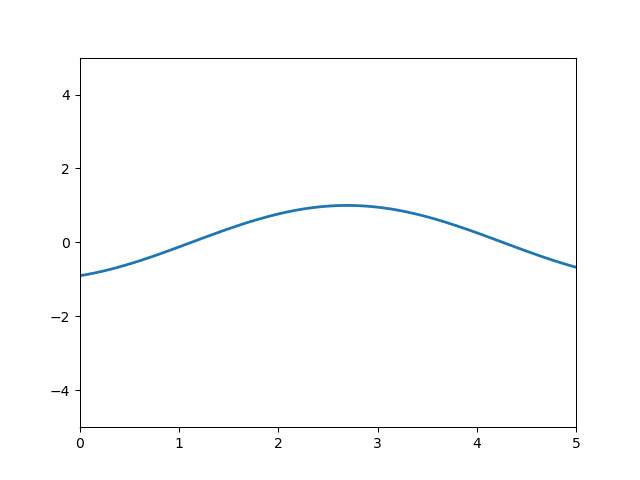

In [1]:
from IPython.display import Image
Image(filename="neural_net_simulation.gif")

In [5]:
!pip install ipywidgets

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import ipywidgets as widgets
from IPython.display import display

# Crear una visualización de la red neuronal con 3 capas
def plot_neural_network(layers, values):
    G = nx.DiGraph()

    # Posiciones para las neuronas en cada capa
    pos = {}
    current_layer_x = 0
    node_labels = {}
    node_colors = []
    for layer_idx, layer_size in enumerate(layers):
        for neuron_idx in range(layer_size):
            neuron_id = f'L{layer_idx}_N{neuron_idx}'
            pos[neuron_id] = (current_layer_x, neuron_idx)
            # Colorear los nodos según los valores que están pasando
            if neuron_id in values:
                val = values[neuron_id].item()  # Extraer el valor individual del array de NumPy
                node_labels[neuron_id] = f'{val:.2f}'
                node_colors.append('lightgreen' if val > 0 else 'lightcoral')
            else:
                node_colors.append('lightblue')
        current_layer_x += 1

    # Añadir conexiones entre las capas
    for layer_idx in range(len(layers) - 1):
        for neuron_idx in range(layers[layer_idx]):
            for next_neuron_idx in range(layers[layer_idx + 1]):
                G.add_edge(f'L{layer_idx}_N{neuron_idx}', f'L{layer_idx+1}_N{next_neuron_idx}')

    # Dibujar la red
    nx.draw(G, pos, with_labels=True, labels=node_labels, node_size=1000, node_color=node_colors, font_size=10, font_weight='bold')
    plt.show()

# Función para pasar los valores a través de la red neuronal
def forward_pass_interactive(X, W1, W2, W_out, b_out):
    # Inicializar diccionario de valores
    values = {}

    # Capa de entrada
    for i in range(len(X)):
        values[f'L0_N{i}'] = X[i]

    # Primera capa oculta
    h1 = np.maximum(0, np.dot(W1, X))  # ReLU activación
    for i in range(len(h1)):
        values[f'L1_N{i}'] = h1[i]

    # Segunda capa oculta
    h2 = np.maximum(0, np.dot(W2, h1))  # ReLU activación
    for i in range(len(h2)):
        values[f'L2_N{i}'] = h2[i]

    # Capa de salida
    y_pred = np.dot(W_out, h2) + b_out
    values['L3_N0'] = y_pred  # Solo una neurona en la salida

    return values

# Definir la estructura de la red neuronal
layers = [3, 4, 4, 1]

# Definir pesos aleatorios para las capas
W1 = np.random.randn(4, 3)  # Pesos para la primera capa
W2 = np.random.randn(4, 4)  # Pesos para la segunda capa
W_out = np.random.randn(1, 4)  # Pesos para la capa de salida
b_out = np.random.randn(1)  # Sesgo de la capa de salida

# Función interactiva para visualizar la red neuronal
def update_network(step):
    # Generar valores de entrada aleatorios en cada iteración para hacerlo más dinámico
    X = np.random.rand(3) * step  # Los valores de entrada cambian según el paso del deslizador
    values = forward_pass_interactive(X, W1, W2, W_out, b_out)
    plot_neural_network(layers, values)

# Deslizador interactivo para controlar el flujo de los valores
slider = widgets.FloatSlider(min=0.1, max=10.0, step=0.5, description="Intensidad")
widgets.interact(update_network, step=slider)

interactive(children=(FloatSlider(value=0.1, description='Intensidad', max=10.0, min=0.1, step=0.5), Output())…

<function __main__.update_network(step)>

#### Comparación si se hubiera definido los pesos de forma aleatoria y no manualmente

In [4]:
# Datos de entrada y salida
X = np.array([[2.5, 3.5, -0.5], [4.0, -1.0, 0.5], [0.5, 1.5, 1.0], [3.0, 2.0, -1.5]])
y = np.array([1.0, -1.0, -1.0, 1.0])

# Inicialización de pesos y sesgos
W1 = np.random.randn(3, 4)
b1 = np.random.randn(4)
W2 = np.random.randn(4, 4)
b2 = np.random.randn(4)
W3 = np.random.randn(4, 1)
b3 = np.random.randn(1)

# Forward Propagation
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

Z1 = X.dot(W1) + b1
A1 = relu(Z1)
Z2 = A1.dot(W2) + b2
A2 = relu(Z2)
Z3 = A2.dot(W3) + b3
y_pred = Z3

# Backward Propagation
delta3 = y_pred - y.reshape(-1, 1)
dW3 = A2.T.dot(delta3)
db3 = delta3.sum(axis=0)

delta2 = delta3.dot(W3.T) * relu_derivative(Z2)
dW2 = A1.T.dot(delta2)
db2 = delta2.sum(axis=0)

delta1 = delta2.dot(W2.T) * relu_derivative(Z1)
dW1 = X.T.dot(delta1)
db1 = delta1.sum(axis=0)

# Mostrar resultados
print("Gradientes de W3:", dW3)
print("Gradientes de W2:", dW2)
print("Gradientes de W1:", dW1)

Gradientes de W3: [[31.39564565]
 [24.60190039]
 [15.32800581]
 [ 0.        ]]
Gradientes de W2: [[  5.79656078  -1.01284582   0.9020834    0.        ]
 [  0.           0.           0.           0.        ]
 [ 50.61666612 -12.82226175  11.42004961   0.        ]
 [  0.           0.           0.           0.        ]]
Gradientes de W1: [[-39.74970114   0.          15.68290169   0.        ]
 [-38.0374485    0.          16.51505328   0.        ]
 [  7.51308514   0.          -5.36244769   0.        ]]


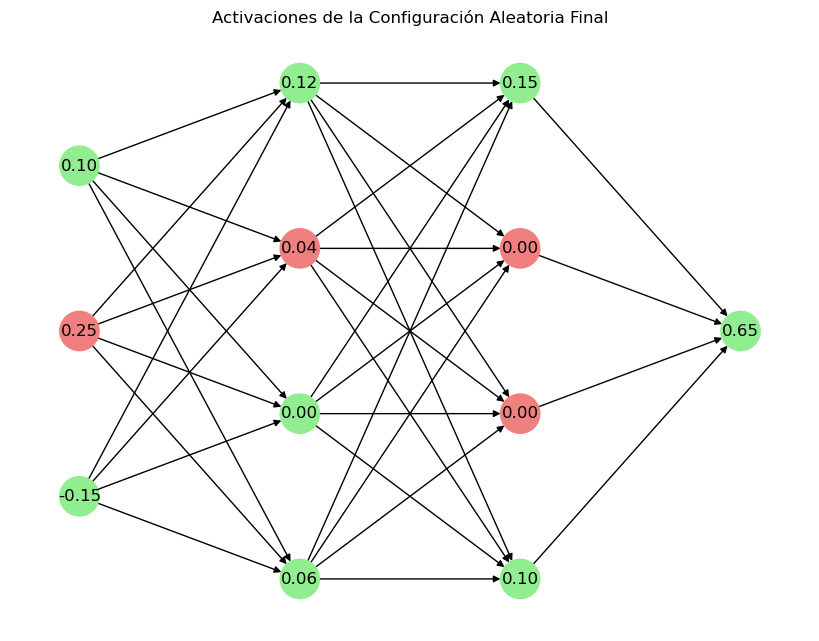

In [7]:
# Función para visualizar la red neuronal con activaciones
def visualize_nn(activations, title="Neural Network"):
    G = nx.DiGraph()

    # Asignar posiciones y colores basados en las capas y activaciones
    pos = {}
    colors = []
    labels = {}
    layer_y = [3, 4, 4, 1]  # Número de nodos por capa (puedes modificarlo según tus capas)

    node_count = 0
    for layer_idx, nodes in enumerate(layer_y):
        for node_idx in range(nodes):
            pos[node_count] = (layer_idx, -node_idx + nodes / 2)
            labels[node_count] = f"{activations[layer_idx][node_idx]:.2f}"
            colors.append('lightgreen' if activations[layer_idx][node_idx] > 0 else 'lightcoral')
            node_count += 1

    # Crea aristas entre las capas
    for layer_idx in range(len(layer_y) - 1):
        start_idx = sum(layer_y[:layer_idx])
        next_start_idx = sum(layer_y[:layer_idx + 1])
        for i in range(layer_y[layer_idx]):
            for j in range(layer_y[layer_idx + 1]):
                G.add_edge(start_idx + i, next_start_idx + j)

    # Dibuja el grafo
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=False, node_size=800, node_color=colors, font_size=10)
    nx.draw_networkx_labels(G, pos, labels=labels, font_color="black")
    plt.title(title)
    plt.show()

# Definir activaciones para la última configuración aleatoria que deseas visualizar
random_activations = [
    [0.10, 0.25, -0.15],  # Capa de entrada
    [0.12, 0.04, 0.00, 0.06],  # Capa oculta 1
    [0.15, 0.00, 0.00, 0.10],  # Capa oculta 2
    [0.65]  # Capa de salida (ejemplo)
]

# Llamar a la función con los valores de activación
visualize_nn(random_activations, title="Activaciones de la Configuración Aleatoria Final")


Comparando con la version manual, vemos que en la version aleatoria hay una mayor dispersión de la activación de la red, donde los pesos aleatorios permiten participar en mayor número de caminos, aunque de una forma menos controlada.

En el manual, vemos algunos nodos iniciales en color rojo, lo que indica que no estan contribuyendo al resutlado final, debido a que los pesos y sesgos definidos manualmente limitan la propragación hacia adelante de ciertas señales a través de la red, incluso dejando un unico camino para llegar al valor de 0.53

En el aleatorio, algunos nodos que estaban inactivos en la configuración manual ahora tienen activaciones positivas (en color verde), mientras que otros permanecen inactivos. Esto muestra que la inicialización aleatoria de los pesos crea un patrón diferente de activaciones, lo que puede activar o desactivar diferentes nodos, obteniendo una salida final de la red de 0.65, lo cual es diferente debido a la variabilidad en el flujo de información causada por los pesos iniciales aleatorios.

Conclusion: La inicialización de pesos en el entrenamiento de redes neuronales es muy importante, debido a que diferentes inicializaciones pueden llevar a diferentes mínimos en el espacio de pérdida y afectar la salida final hasta que el modelo se optimice adecuadamente.